In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleveland.csv', header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df['target'].map({0:0, 1:0, 2:1, 3:1, 4:1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


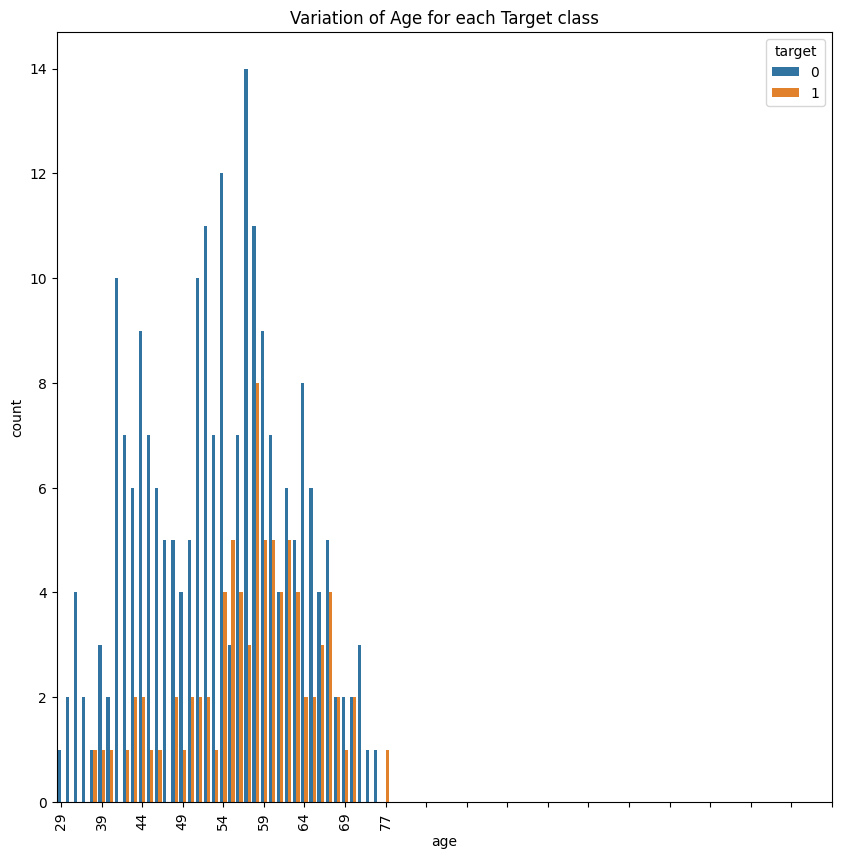

In [48]:
# count target variable base on age
# Your code here ******************************
fig, ax = plt.subplots(figsize=(10,10))
age_target_counts = df.groupby(['age', 'target']).size().reset_index(name='count')

sns.barplot(x='age', y='count', hue='target', data=age_target_counts)
plt.xticks(np.arange(0, 100, 5), rotation=90)
plt.title('Variation of Age for each Target class')
plt.show()


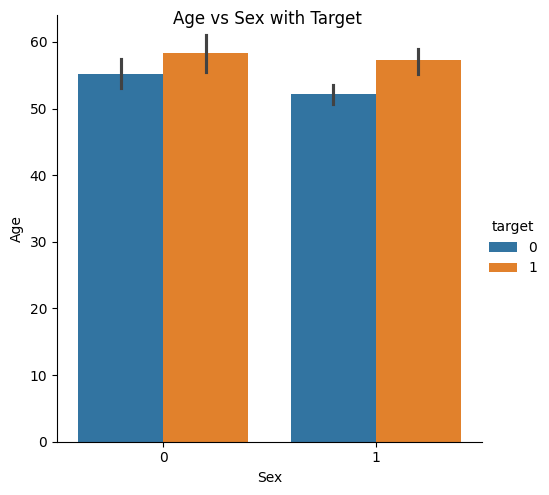

In [50]:
# bai tap 2
# barplot of age vs sex with hue = target
# Your code here ******************************

g = sns.catplot(x='sex', y='age', hue='target', data=df, kind='bar')
g.set_axis_labels('Sex', 'Age')
g.fig.suptitle('Distribution of Age vs Sex with Target class')
plt.show()



In [52]:
# bai tap 3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Your code here ******************************
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=5,
                            weights='uniform', 
                            algorithm='auto',
                            leaf_size=30, 
                            p=2,
                            metric='minkowski')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_for_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_for_test = accuracy_score(y_test, y_pred)
print(f'Accuracy for training data: {accuracy_for_train}')
print(f'Accuracy for test data: {accuracy_for_test}')

Accuracy for training data: 0.7892561983471075
Accuracy for test data: 0.7049180327868853


In [53]:
# bai tap 4
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

# Your code here ******************************
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
clf = SVC(kernel='rbf',
          random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_for_train = accuracy_score(y_train, clf.predict(X_train))
accuracy_for_test = accuracy_score(y_test, y_pred)
print(f'Accuracy for training data: {accuracy_for_train}')
print(f'Accuracy for test data: {accuracy_for_test}')

Accuracy for training data: 0.7355371900826446
Accuracy for test data: 0.6721311475409836
